# Task-1 : BEGINNER LEVEL TASK

### Task 03: Music Recommendation:

Music recommender systems can suggest songs to users based on their listening patterns.

Datasetlinks  Watch Tutorial from here https://youtu.be/CBCfOTePVPo

https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data

In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno
import gc
import lightgbm as lgb
from xgboost import XGBClassifier

In [2]:
# loading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
songs = pd.read_csv('songs.csv')
members = pd.read_csv('members.csv')
song_extra_info = pd.read_csv('song_extra_info.csv')

In [3]:
# printing the number of rows and columns of all the files
print('Shape of train file is : ', train.shape)
print('Shape of test file is : ', test.shape)
print('Shape of songs file is : ', songs.shape)
print('Shape of members file is : ', members.shape)
print('Shape of songs_extra_info file is : ', song_extra_info.shape)

Shape of train file is :  (7768, 6)
Shape of test file is :  (7787, 6)
Shape of songs file is :  (21099, 7)
Shape of members file is :  (34403, 7)
Shape of songs_extra_info file is :  (27245, 3)


In [4]:
# printing the names of rows in each dataset
print('Features of train : ', train.columns)
print('Features of test :', test.columns)
print('Features of songs : ', songs.columns)
print('Features of members : ', members.columns)
print('Features of songs_extra_info : ', song_extra_info.columns)

Features of train :  Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')
Features of test : Index(['id', 'msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type'],
      dtype='object')
Features of songs :  Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')
Features of members :  Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')
Features of songs_extra_info :  Index(['song_id', 'name', 'isrc'], dtype='object')


### Train data analysis

In [5]:
# information about train data using pandas
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7768 entries, 0 to 7767
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   msno                7768 non-null   object 
 1   song_id             7767 non-null   object 
 2   source_system_tab   7753 non-null   object 
 3   source_screen_name  7577 non-null   object 
 4   source_type         7753 non-null   object 
 5   target              7767 non-null   float64
dtypes: float64(1), object(5)
memory usage: 364.2+ KB


In [6]:
def count_plot(data, x, hue, type):
  '''Function to plot histograms with respect to argument type (category/target)'''
  plt.figure(figsize=(18,15))
  sns.set(font_scale=2)
  sns.countplot(x=x, hue=hue, data=data)
  plt.xlabel(x,fontsize=30)
  plt.ylabel('count',fontsize=30)
  plt.xticks(rotation='90')
  plt.title('Count plot for {0} in {1} data'.format(x, type),fontsize=30)
  plt.tight_layout()

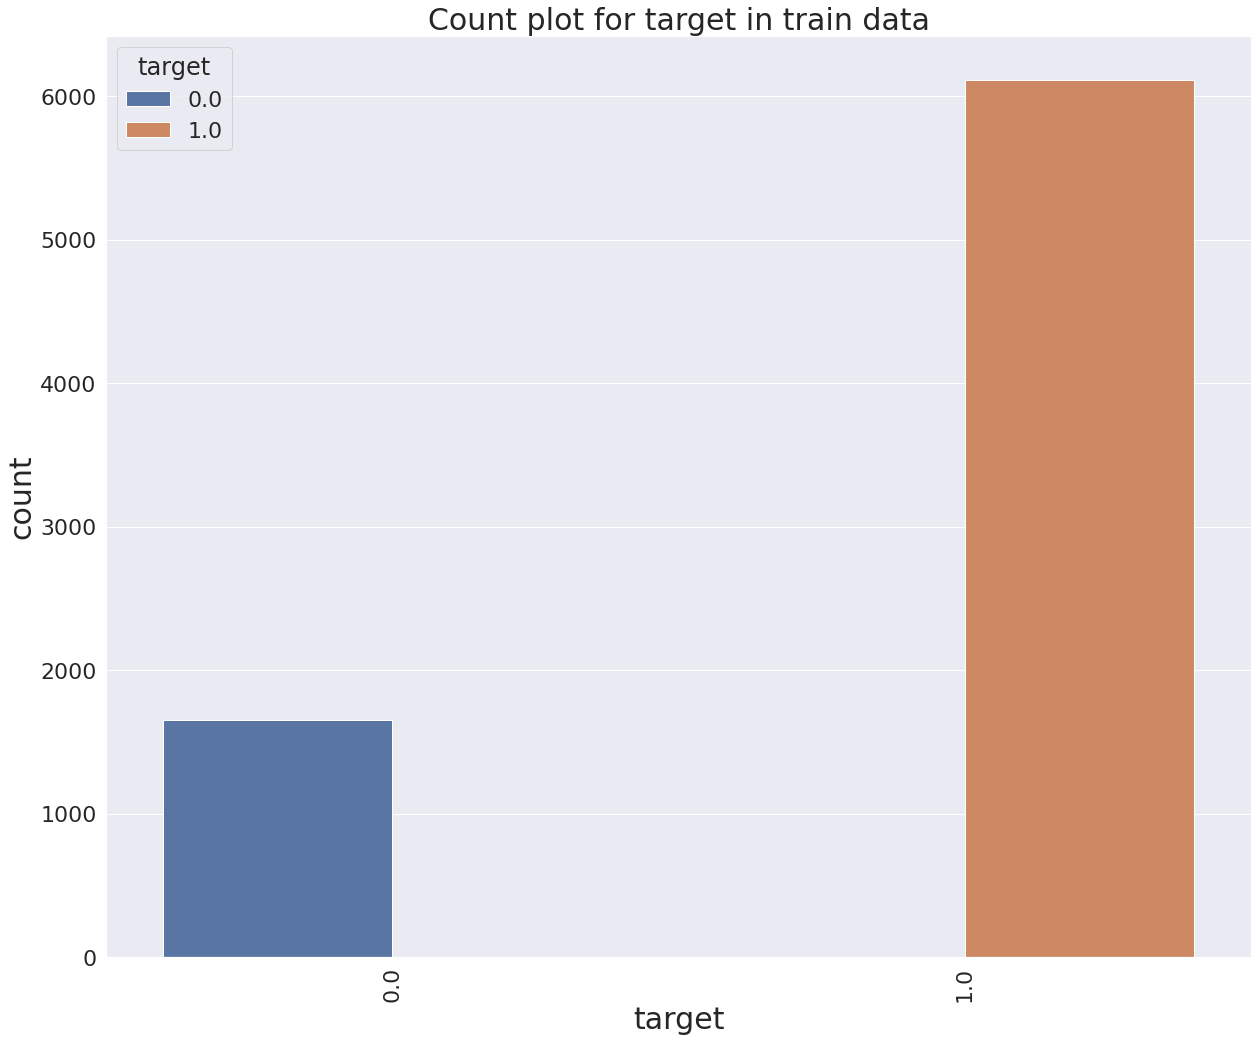

In [7]:
count_plot(train, 'target', 'target', 'train')

In [8]:
print('Data for label 1 : {:.4f}%'.format(train['target'].value_counts()[0]/train.shape[0] * 100))
print('Data for label 0 : {:.4f}%'.format(train['target'].value_counts()[1]/train.shape[0] * 100))


Data for label 1 : 21.2539%
Data for label 0 : 78.7333%




*   From the above plots we can say that the data is almost balanced.
*   Label-1 data is around 49.6% and label-0 data is around 50.4%.



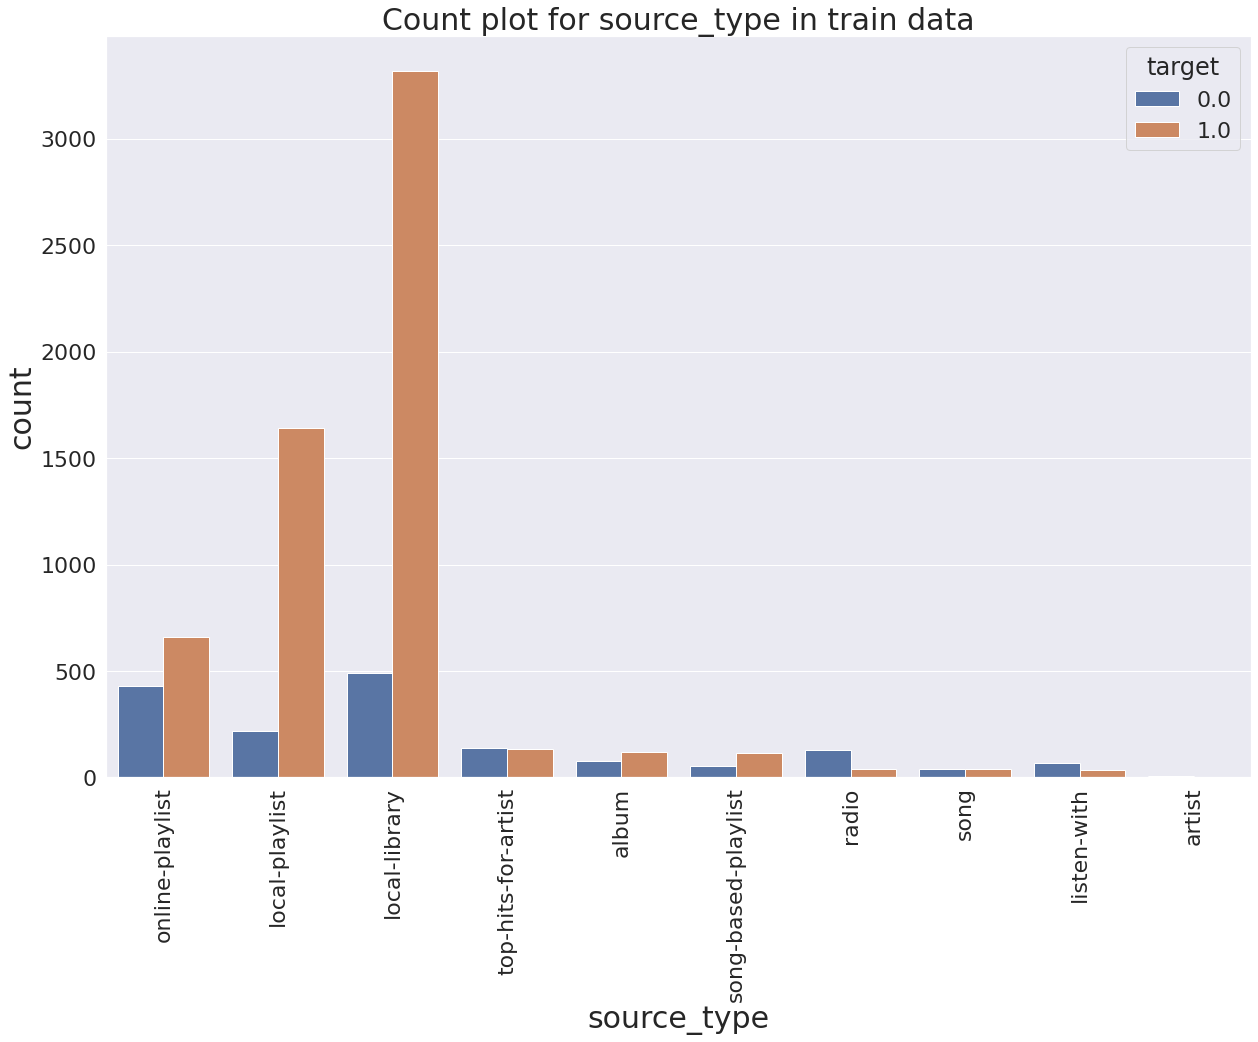

In [9]:
count_plot(train, 'source_type', 'target', 'train')

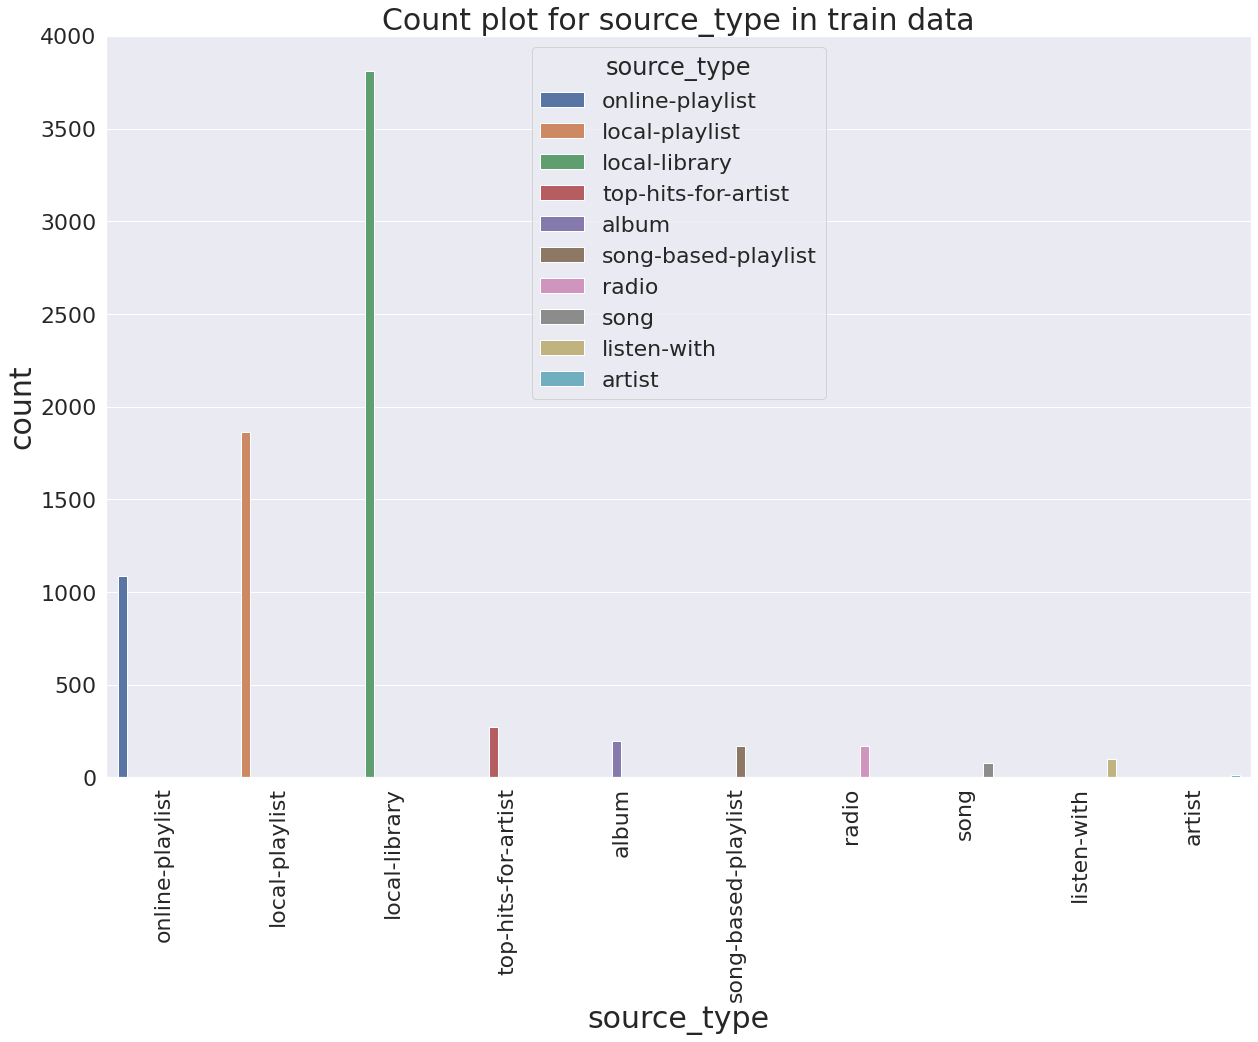

In [10]:
count_plot(train, 'source_type', 'source_type', 'train')



*   source_type is the entry point, a user first plays music on mobile apps.
*   From the above plots we can say that, most of the users starts playing songs via their local-library, online-playlist or local-playlist.

*   People don't start listening music with artist or daily-playlist






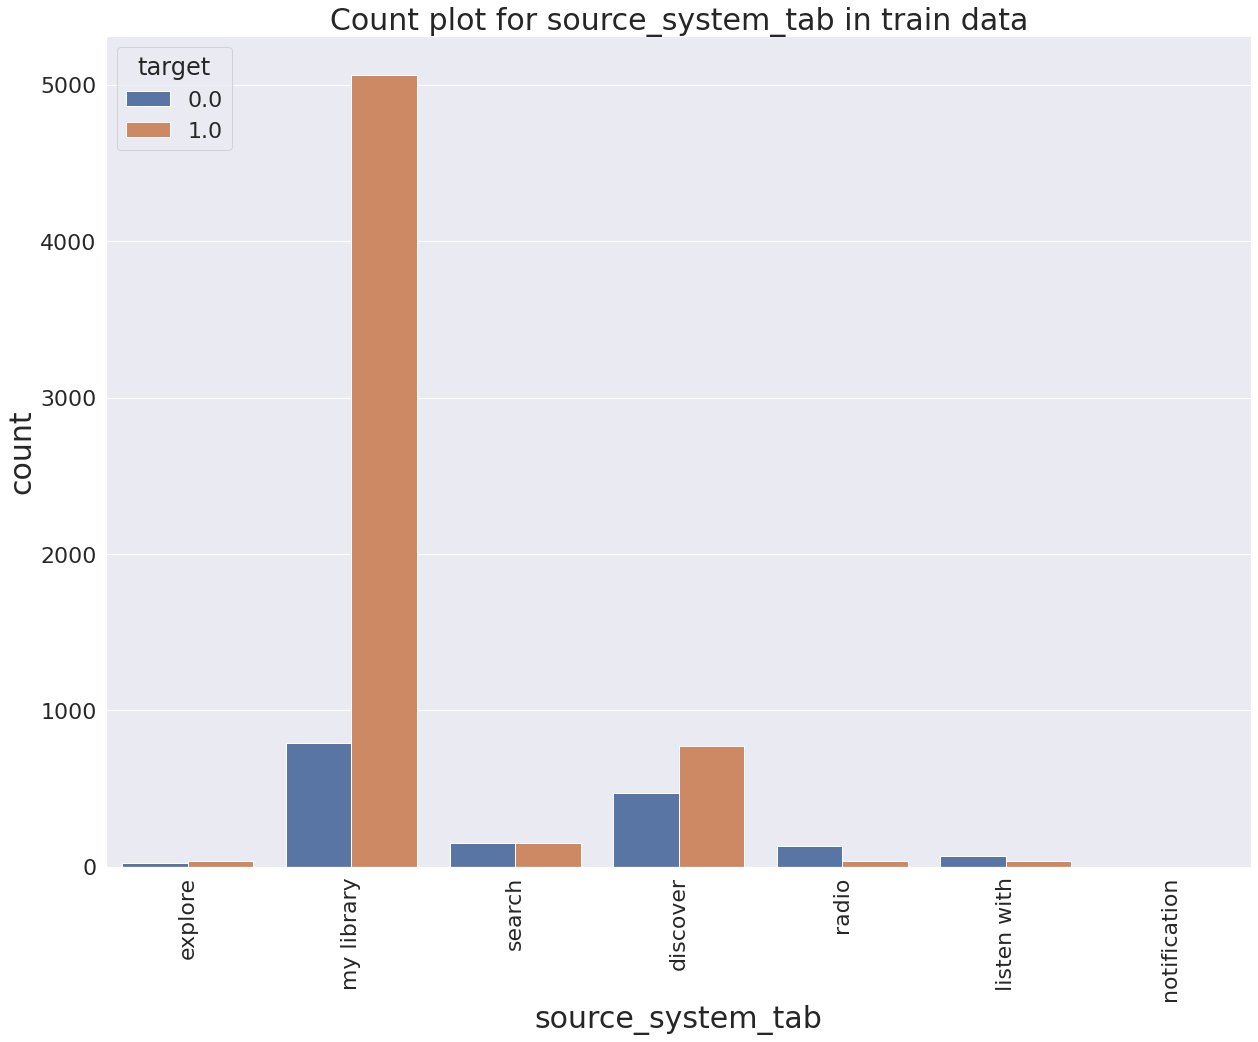

In [11]:
count_plot(train, 'source_system_tab', 'target', 'train')

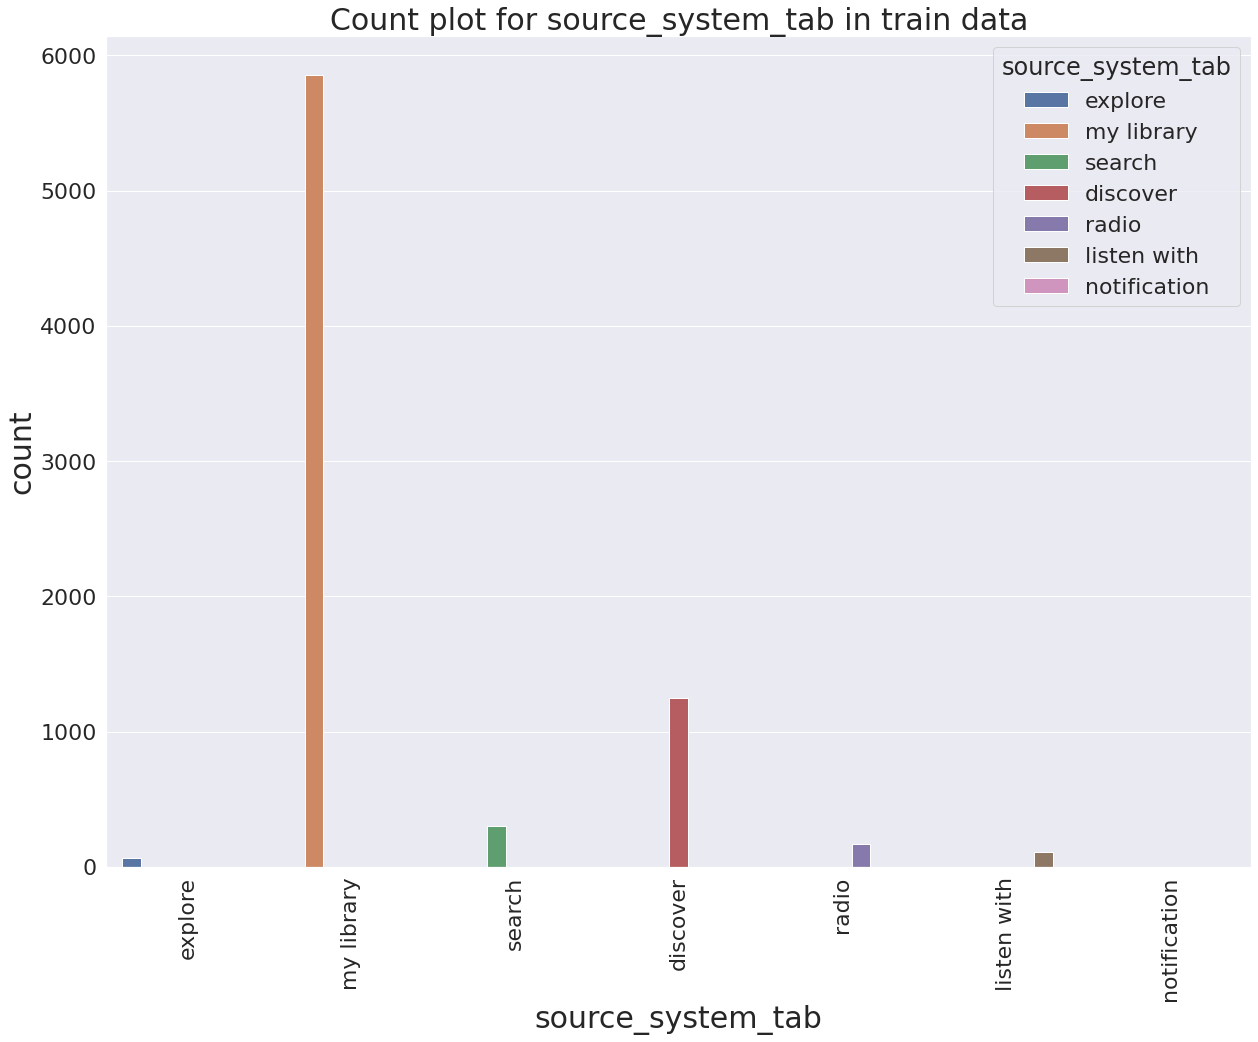

In [13]:
count_plot(train, 'source_system_tab', 'source_system_tab', 'train')



* source_system_tab indicates the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions.  
*   It can be depicted from the above plot that people repeat songs from their library or discover tabs.

*   From notifications or settings tab people are not interested to repeat songs






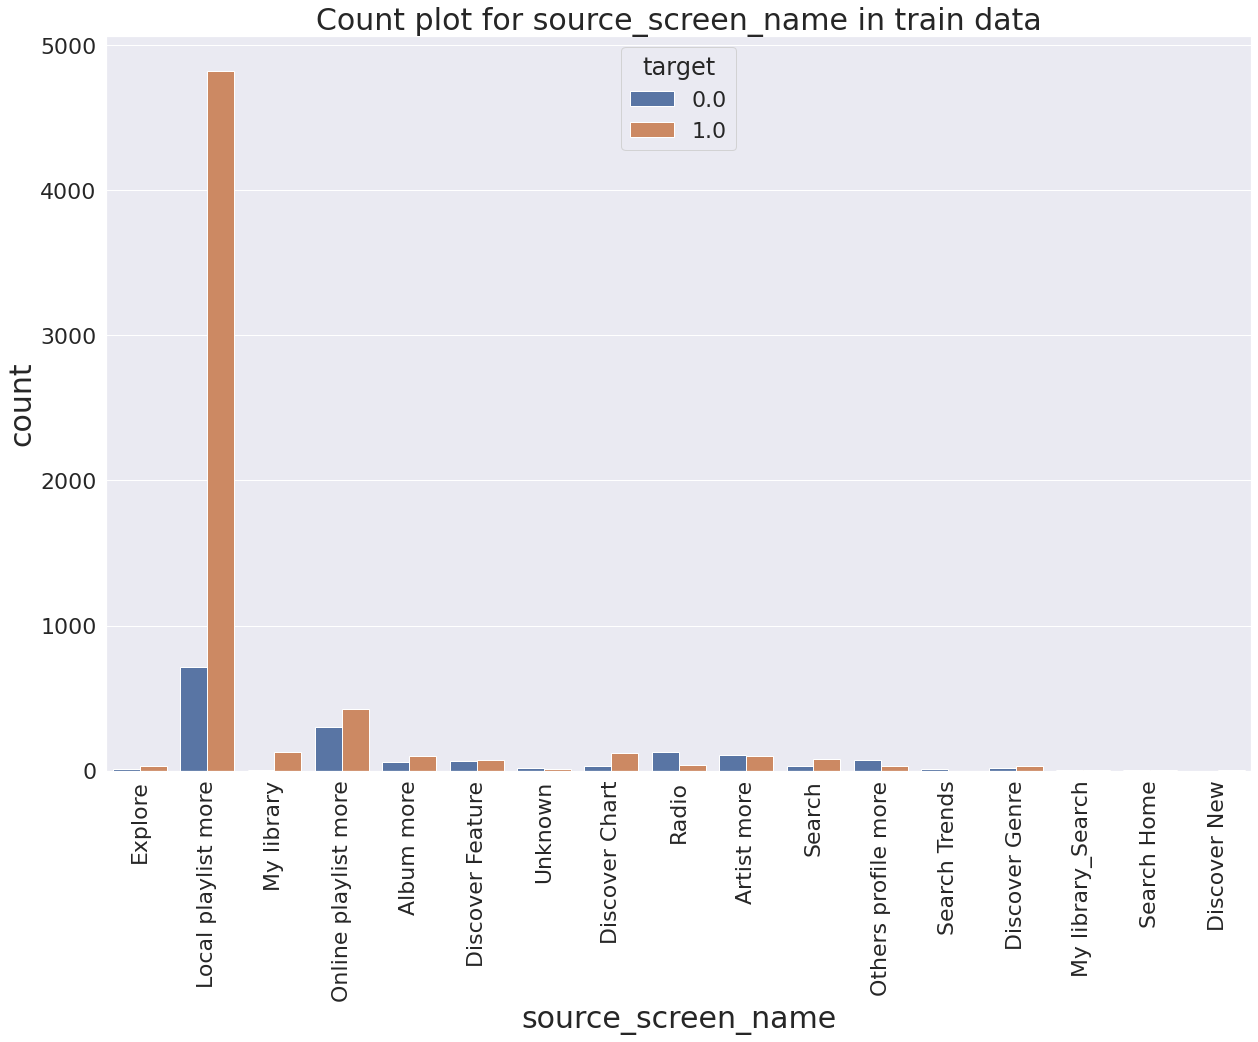

In [12]:
count_plot(train, 'source_screen_name', 'target', 'train')


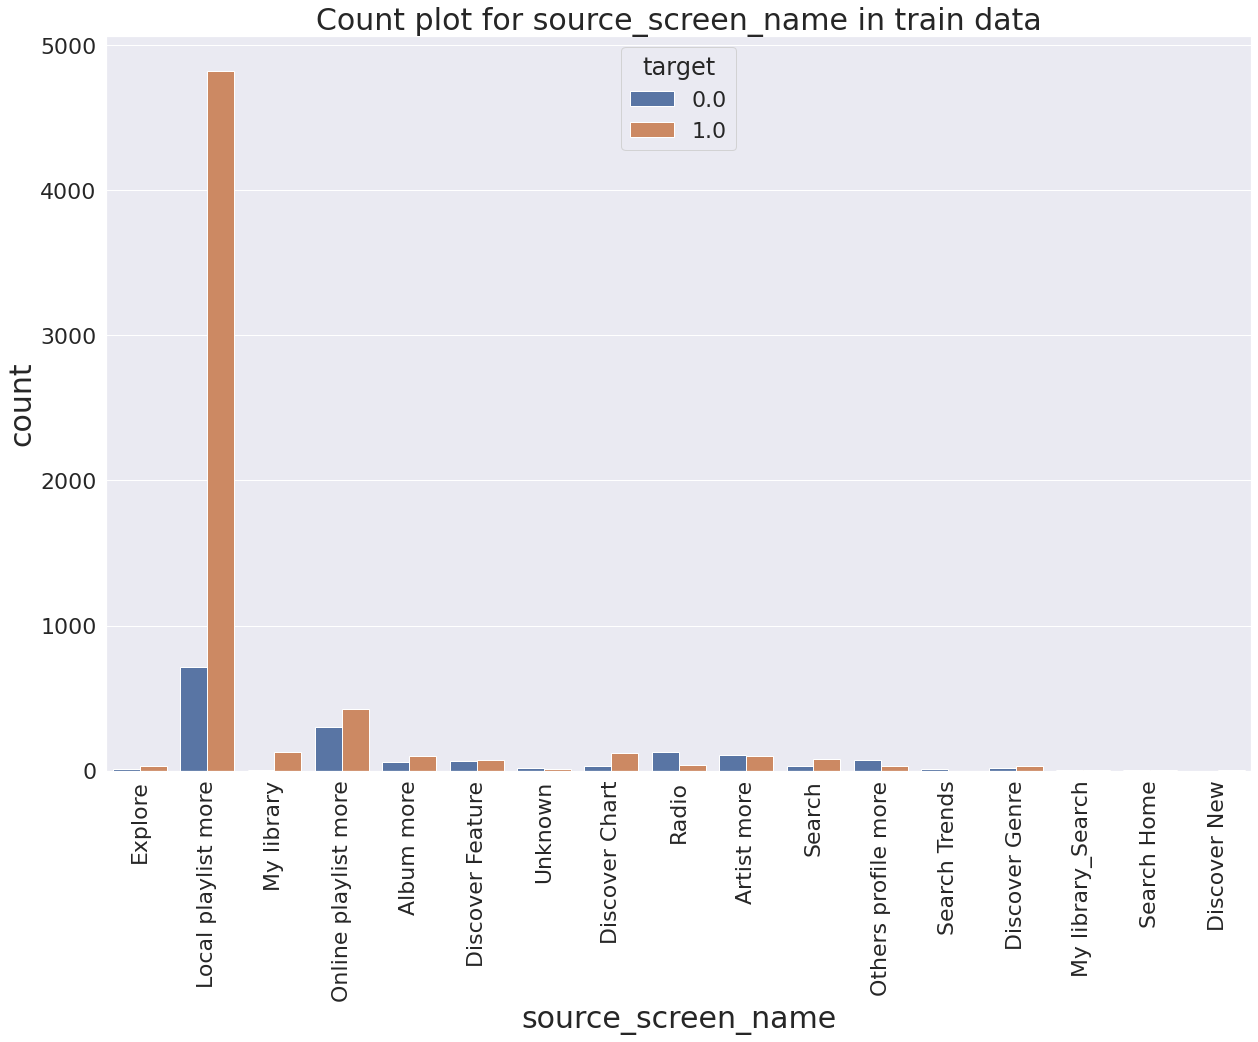

In [17]:
count_plot(train, 'source_screen_name', 'target', 'train')



*   source_screen_name is the name of the layout a user sees.

*   Most of the users prefer local_playlist
or online_playlist_more as their favourite layouts.





### Members data Analysis

In [18]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [19]:
def count_plot_function(data, x):
  '''Function to plot histograms for categories'''
  plt.figure(figsize=(18,15))
  sns.set(font_scale=2)
  sns.countplot(x=x, data=data)
  plt.xlabel(x,fontsize=30)
  plt.ylabel('count',fontsize=30)
  plt.xticks(rotation='90')
  plt.title('Count plot',fontsize=30)
  plt.tight_layout()

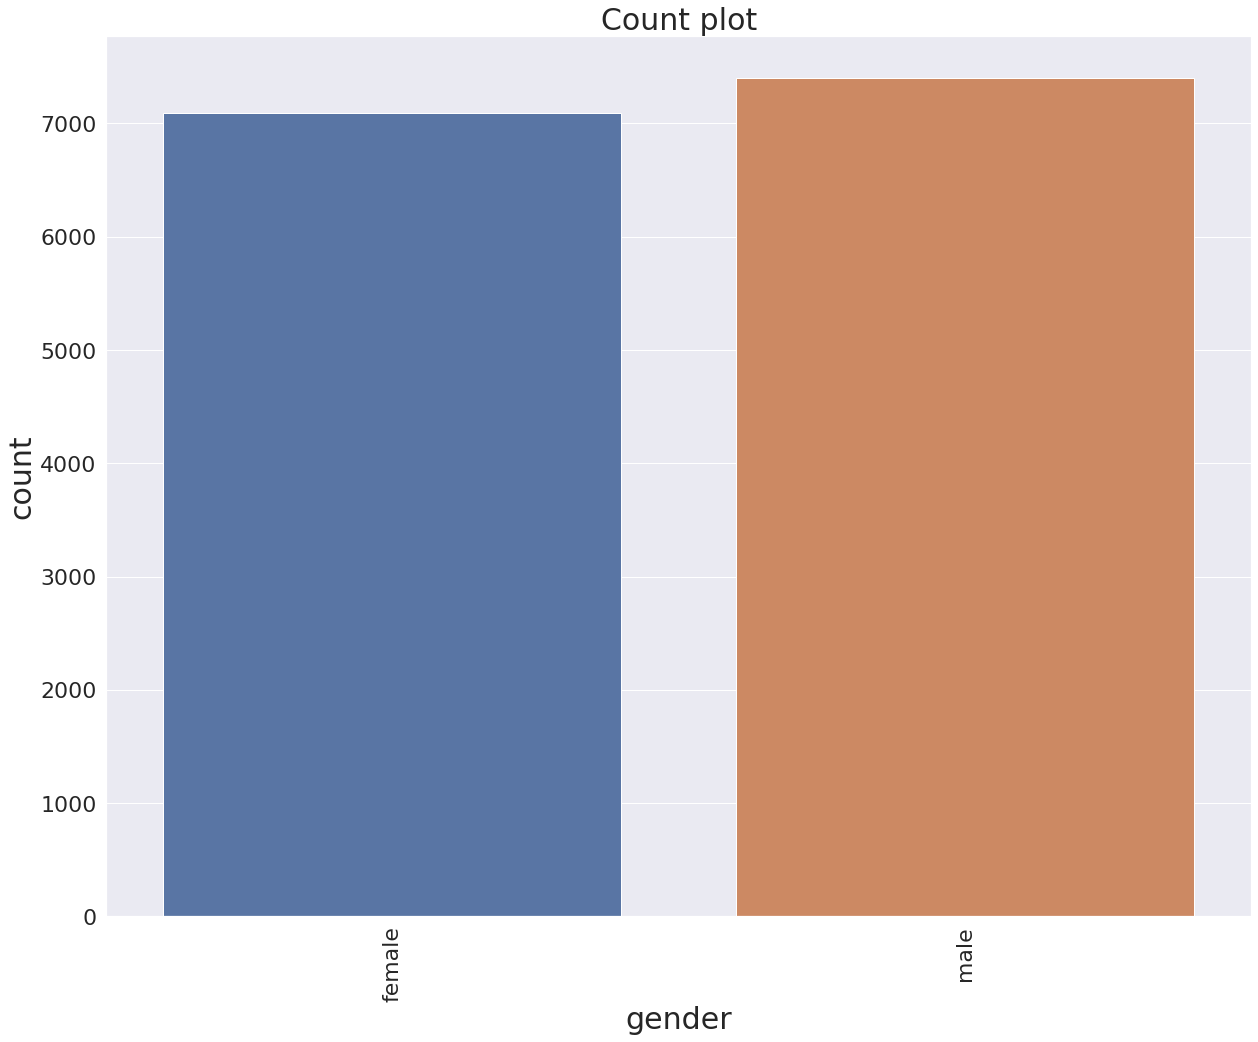

In [20]:
count_plot_function(members, 'gender')

Both male and female users prefer to listen songs equally.

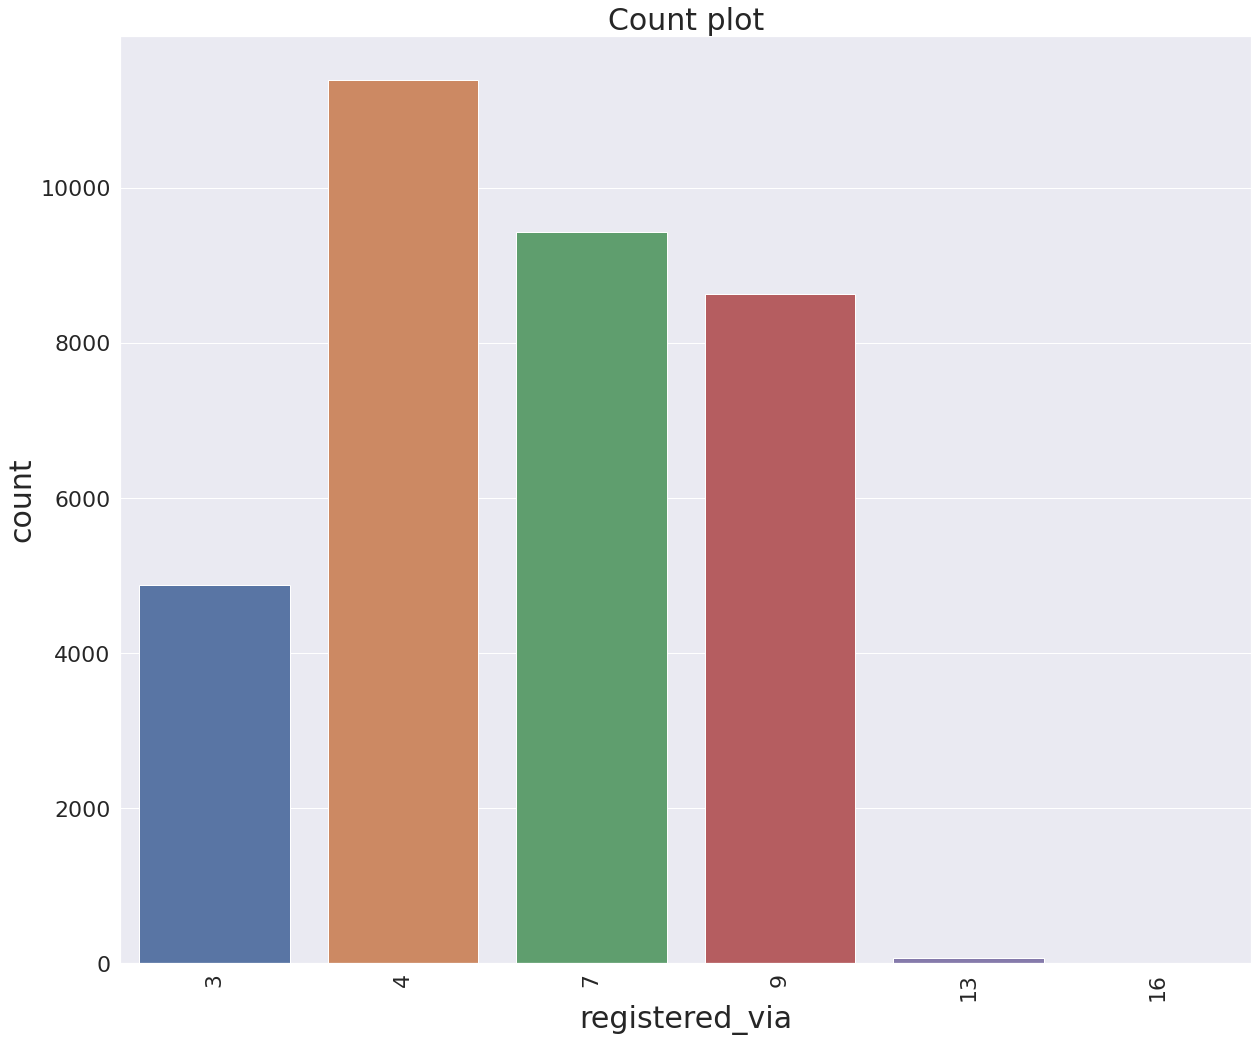

In [21]:
count_plot_function(members, 'registered_via')



*   Most of the registrations happened via method '4', '7' and '9'.
*   Few uses have registered theirselves via '13' and '16' methods.



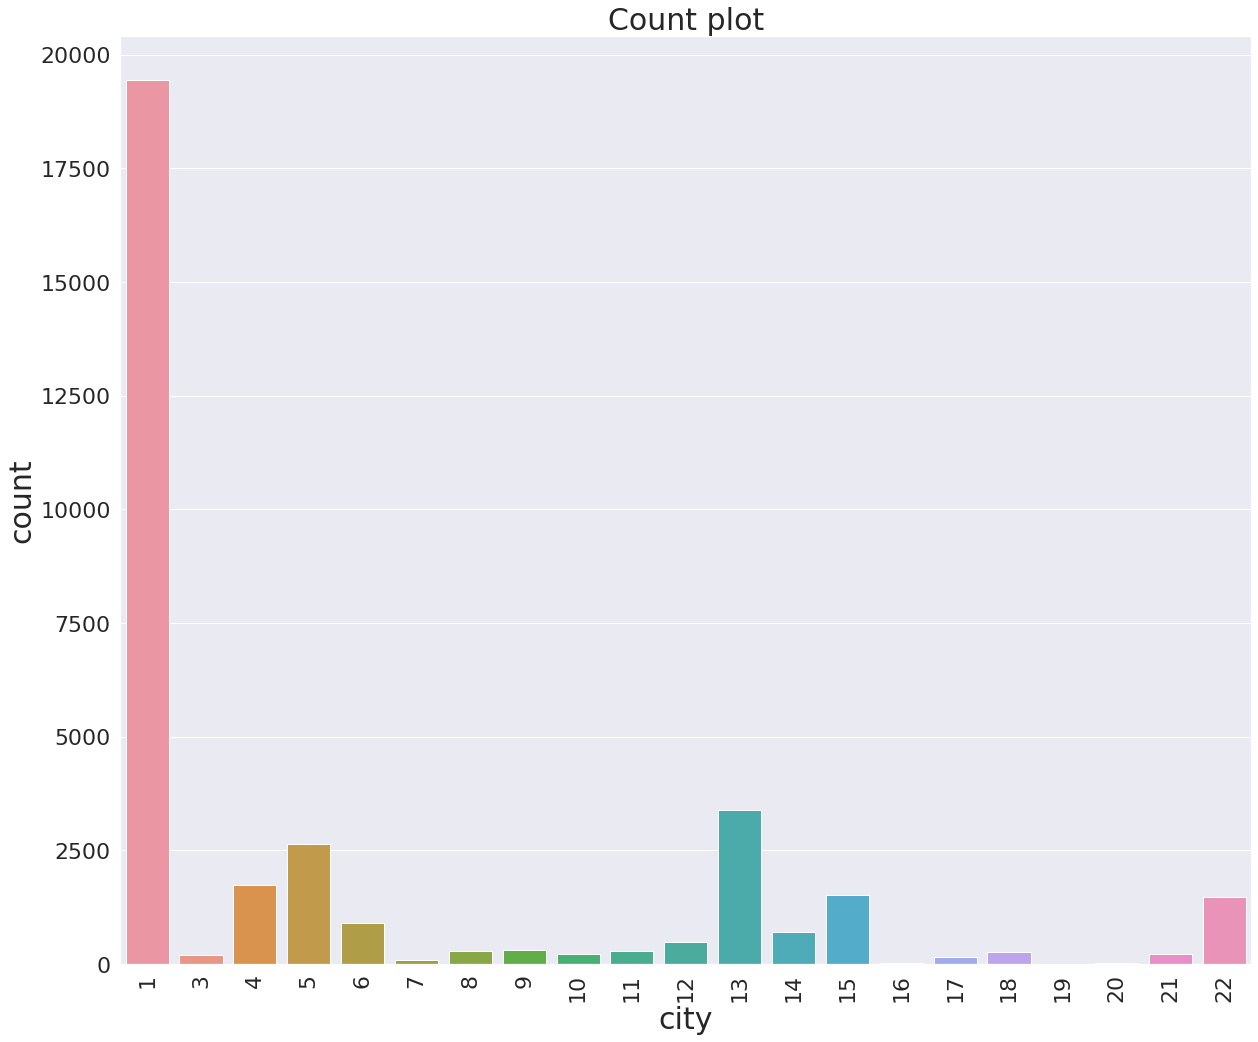

In [22]:
count_plot_function(members, 'city')



*  Most of the people who used to listen songs are from '1'- labelled city. 
*   Some cities have very few people who prefer listening music via this music app.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDF for registration')

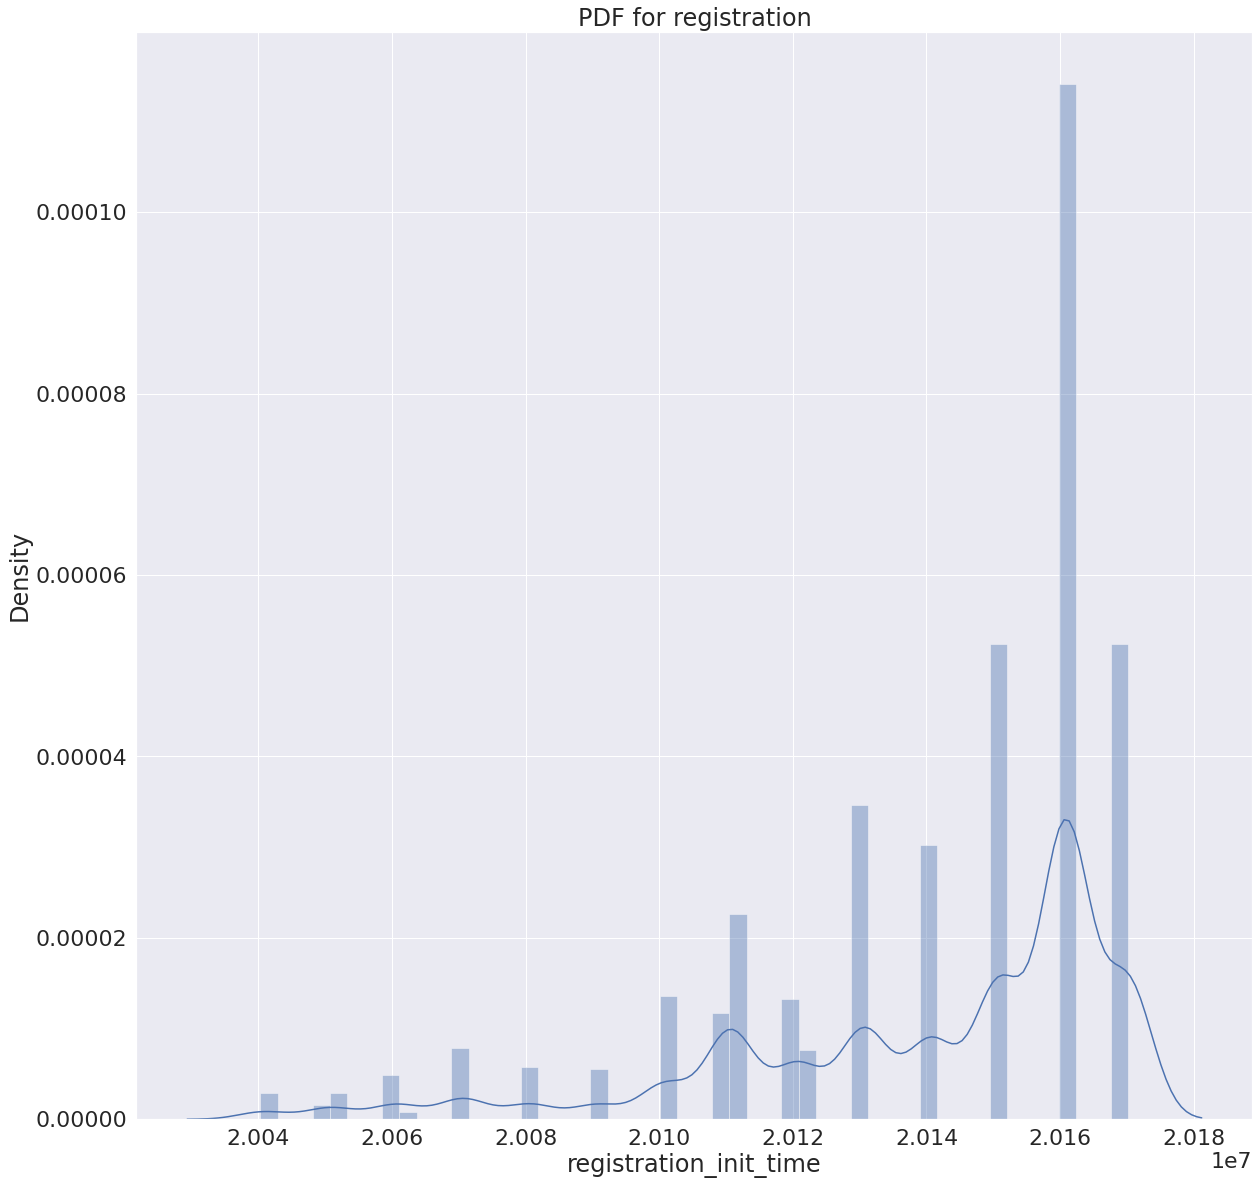

In [23]:
plt.figure(figsize = (20, 20)) 
sns.distplot(members.registration_init_time)
sns.set(font_scale=2)
plt.title('PDF for registration')



*   We can see that initially people were not fond of listening music but after certain amount time people started to listen music and registered themselves to this music app.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDF for registration')

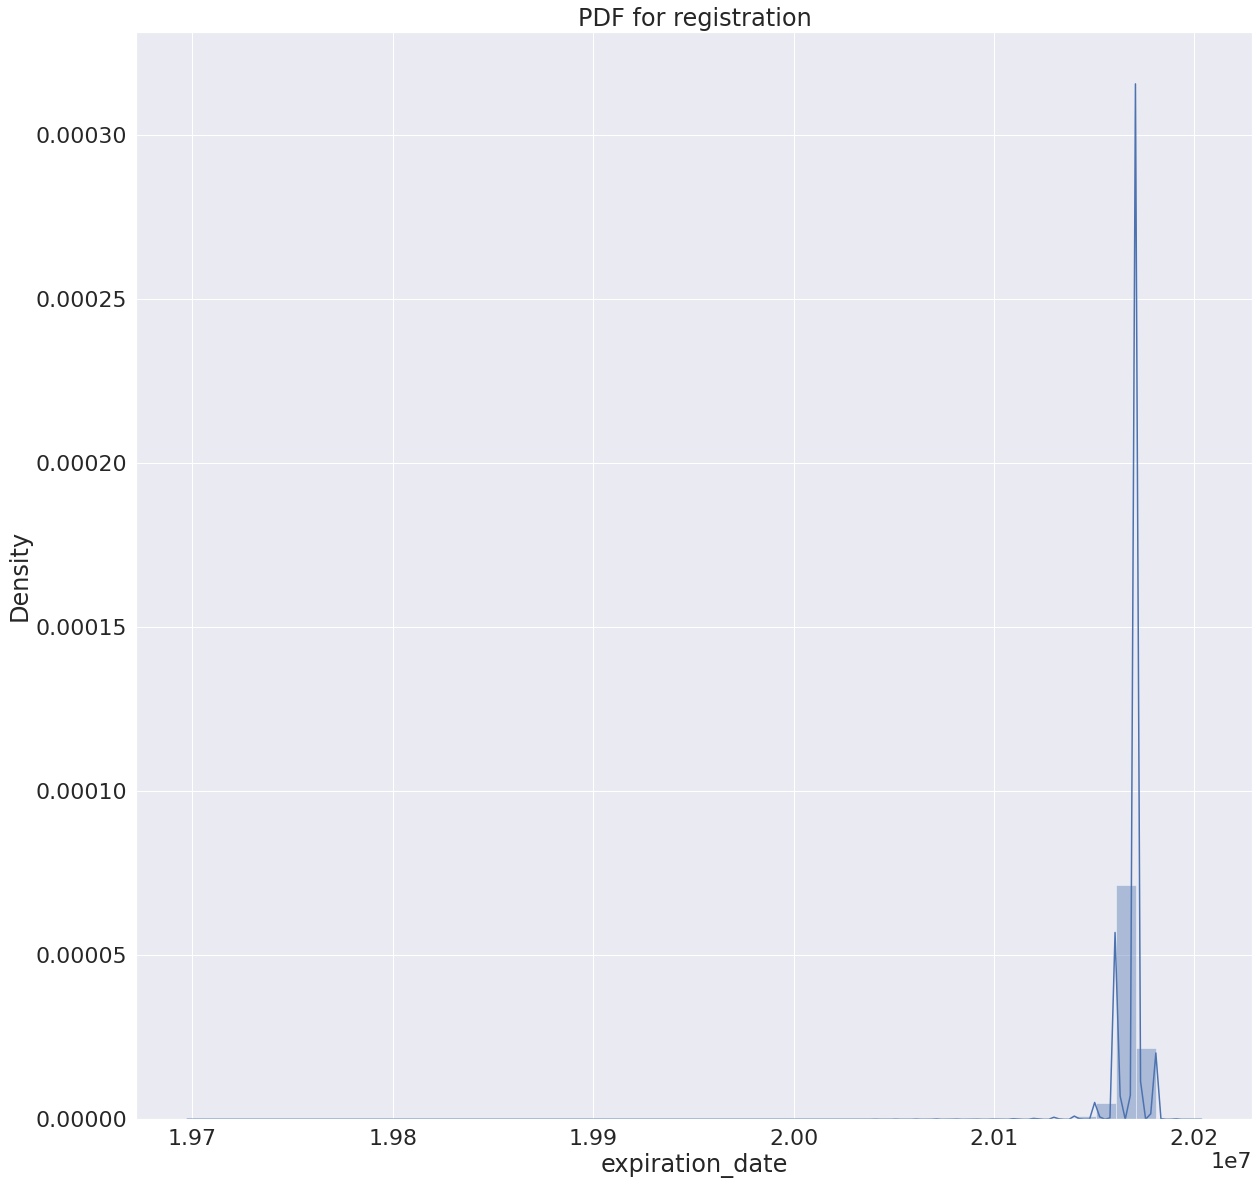

In [24]:
plt.figure(figsize = (20, 20)) 
sns.distplot(members['expiration_date'])
sns.set(font_scale=2)
plt.title('PDF for registration')



*   We have seen that after certain time people start registering themselves for the music app, their expiration period also starts increasing after certain time period.



In [25]:
members.bd.unique()

array([   0,   43,   28,   33,   20,   30,   29,   26,   25,   21,   22,
         16,   23,   37,   18,   19,   51,   24,   17,   45,   36,   57,
         27,   34,   32,   15,   48,   50,   54,   47,   35,   46,   31,
         14,   41,   59,    2,   40,   38,   55,   39,   73,   49,   44,
        103,   52,   70,   42,   65,   56,  101,   58,   53,   64,   63,
         76,   66,   97,    3,   72,   67,   62,   61,  105,   60,   13,
         90,   12,   68,  131,   74,   89,  931,  -38,  144,   85,  112,
         96,   11,  102,   83, 1051,   87,    7,   95,  -43,  111,   93,
          5,   78, 1030,  106,  107,   82,   10])

In [26]:
def plot_pdf_cdf(x, flag):
  '''Function to plot pdf and cdf'''
  plt.figure(figsize = (15, 10)) 
  kwargs = {'cumulative': True}
  if flag:
    sns.distplot(x, hist_kws=kwargs, kde_kws=kwargs)
    plt.title('CDF for age')
  else:
    sns.distplot(x)
    plt.title('PDF for age')
  sns.set(font_scale=2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


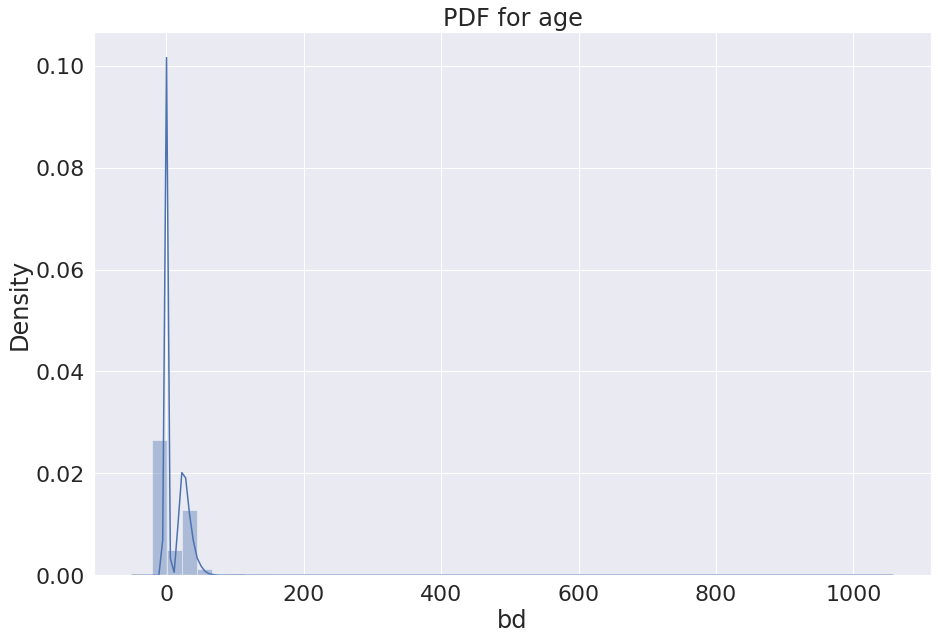

In [27]:
plot_pdf_cdf(members['bd'], False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


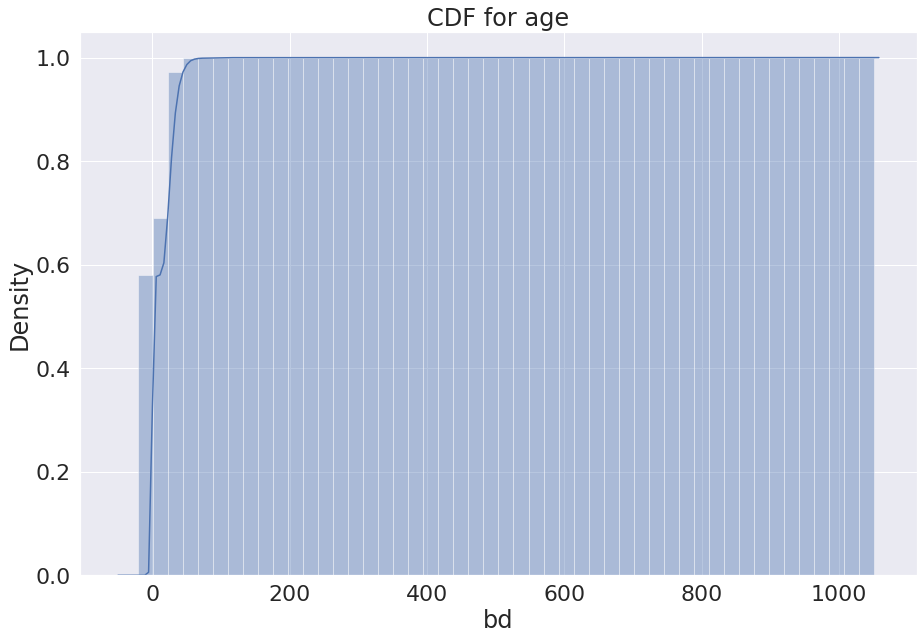

In [28]:
plot_pdf_cdf(members['bd'], True)

In [29]:
np.percentile(members['bd'].values, 98)

47.0



*   98th percentile user is of 47 age.
*   Means most of the user are below 50.
*   We can also observe via above CDF that almost 99% values are below 50.
*   There are also some outliers like 1030, -38, -43, 1051, etc. As age cannot be negative value or more than 1000 for humans.



### Songs data analysis


*   We have two files which contains information about songs so let's merge two files: songs and song_extra_info on 'song_id' and analyze features in details.


In [30]:
songs_all_info = songs.merge(song_extra_info, on='song_id')

In [31]:
def isrc_to_year(isrc):
    if type(isrc) == str:
        if int(isrc[5:7]) > 17:
            return 1900 + int(isrc[5:7])
        else:
            return 2000 + int(isrc[5:7])
    else:
        return np.nan

songs_all_info['song_year'] = songs_all_info['isrc'].apply(isrc_to_year)

In [32]:
songs_all_info['language'].unique()

array([31., 17.,  3., 10., 52., -1., 24., 45., 59., 38.])

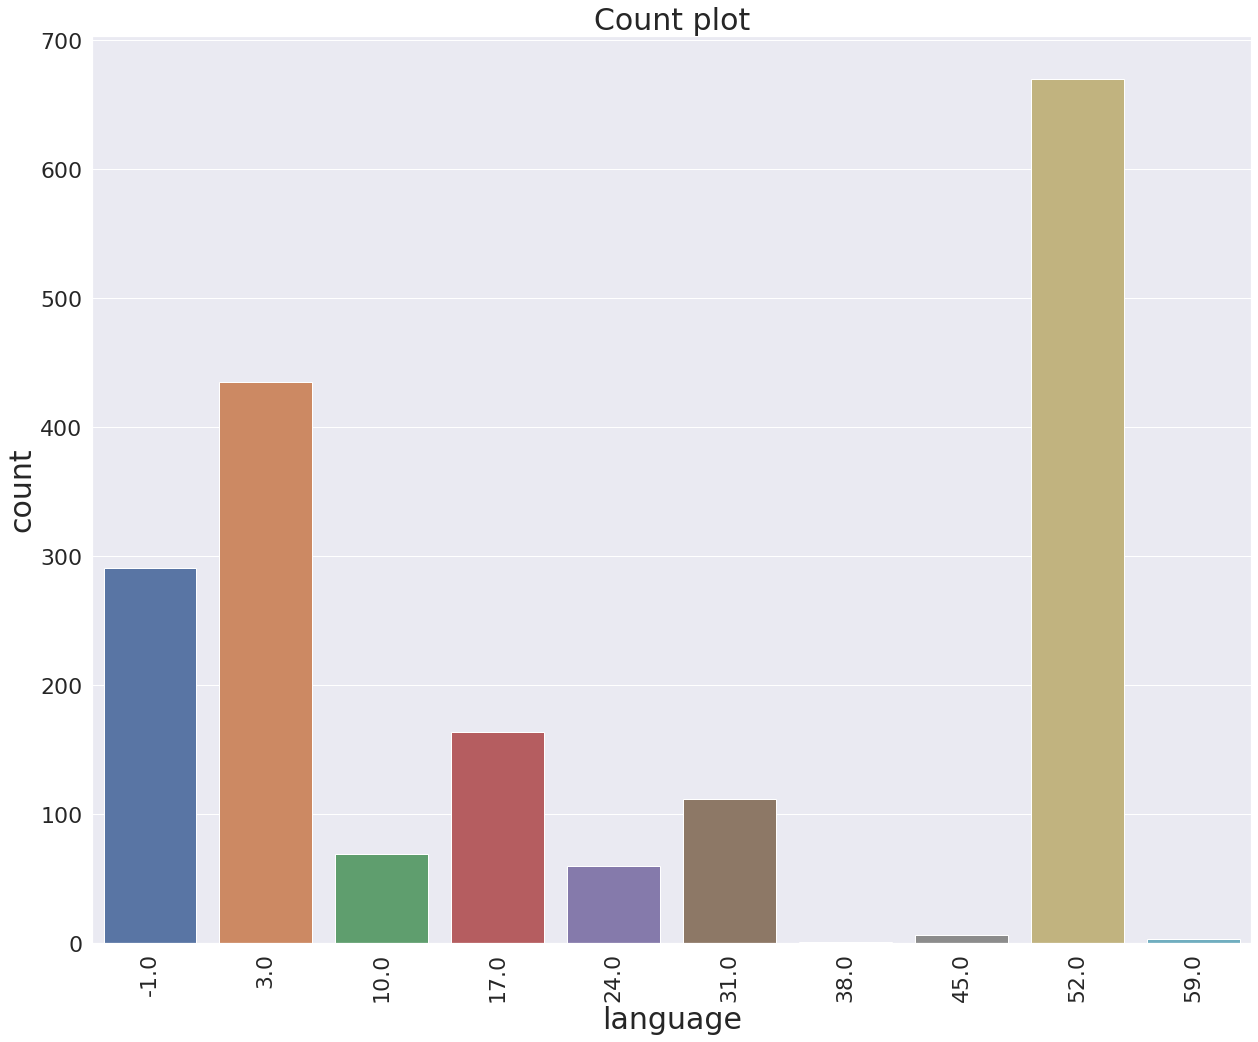

In [33]:
count_plot_function(songs_all_info, 'language')



*   Users prefer to listen songs from '52' and '-1' language.



## Merging of data and analysis

### Missing values

We will check % of missing values in each column of dataframe.

In [34]:
def check_missing_values(df):
  '''Function to check missing values in df'''
  for col in df.columns:
    nan_count = df[col].isnull().sum()
    total = df.shape[0]
    percentage = nan_count/total * 100
    print(col, 'has {:.2f}% missing values'.format(percentage))

In [35]:
print('Missing values analysis for train data')
check_missing_values(train)

Missing values analysis for train data
msno has 0.00% missing values
song_id has 0.01% missing values
source_system_tab has 0.19% missing values
source_screen_name has 2.46% missing values
source_type has 0.19% missing values
target has 0.01% missing values


In [36]:
print('Missing values analysis for memebrs data')
check_missing_values(members)

Missing values analysis for memebrs data
msno has 0.00% missing values
city has 0.00% missing values
bd has 0.00% missing values
gender has 57.85% missing values
registered_via has 0.00% missing values
registration_init_time has 0.00% missing values
expiration_date has 0.00% missing values


In [37]:
print('Missing values analysis for songs data')
check_missing_values(songs)

Missing values analysis for songs data
song_id has 0.00% missing values
song_length has 0.00% missing values
genre_ids has 1.72% missing values
artist_name has 0.00% missing values
composer has 41.75% missing values
lyricist has 71.53% missing values
language has 0.00% missing values


In [38]:
print('Missing values analysis for songs_all_info data')
check_missing_values(songs_all_info)

Missing values analysis for songs_all_info data
song_id has 0.00% missing values
song_length has 0.00% missing values
genre_ids has 1.66% missing values
artist_name has 0.00% missing values
composer has 39.98% missing values
lyricist has 68.53% missing values
language has 0.00% missing values
name has 0.00% missing values
isrc has 15.02% missing values
song_year has 15.02% missing values




*   We can see that train data has over all missing values below 6%.
*   In members data 'gender' feature has 57.85% missing values.

*   Songs has 'composer' and 'lyricist' features which contains 47% and 85% missing values respectively.






In [39]:
train_members = pd.merge(train, members, on='msno', how='left')
train_merged = pd.merge(train_members, songs_all_info, on='song_id', how='left')

In [40]:
test_members = pd.merge(test, members, on='msno', how='left')
test_merged = pd.merge(test_members, songs_all_info, on='song_id', how='left')

In [41]:
del train_members
del test_members

In [42]:
check_missing_values(train_merged)

msno has 0.00% missing values
song_id has 0.01% missing values
source_system_tab has 0.19% missing values
source_screen_name has 2.46% missing values
source_type has 0.19% missing values
target has 0.01% missing values
city has 0.01% missing values
bd has 0.01% missing values
gender has 41.14% missing values
registered_via has 0.01% missing values
registration_init_time has 0.01% missing values
expiration_date has 0.01% missing values
song_length has 99.37% missing values
genre_ids has 99.38% missing values
artist_name has 99.37% missing values
composer has 99.43% missing values
lyricist has 99.49% missing values
language has 99.37% missing values
name has 99.37% missing values
isrc has 99.50% missing values
song_year has 99.50% missing values




*   After merging we can say that, 'gender' feature has 40%, 'composer' has 23% and 'lyricist' has 43% missing values.
*   Other fetaures are having less than 8% missing values.



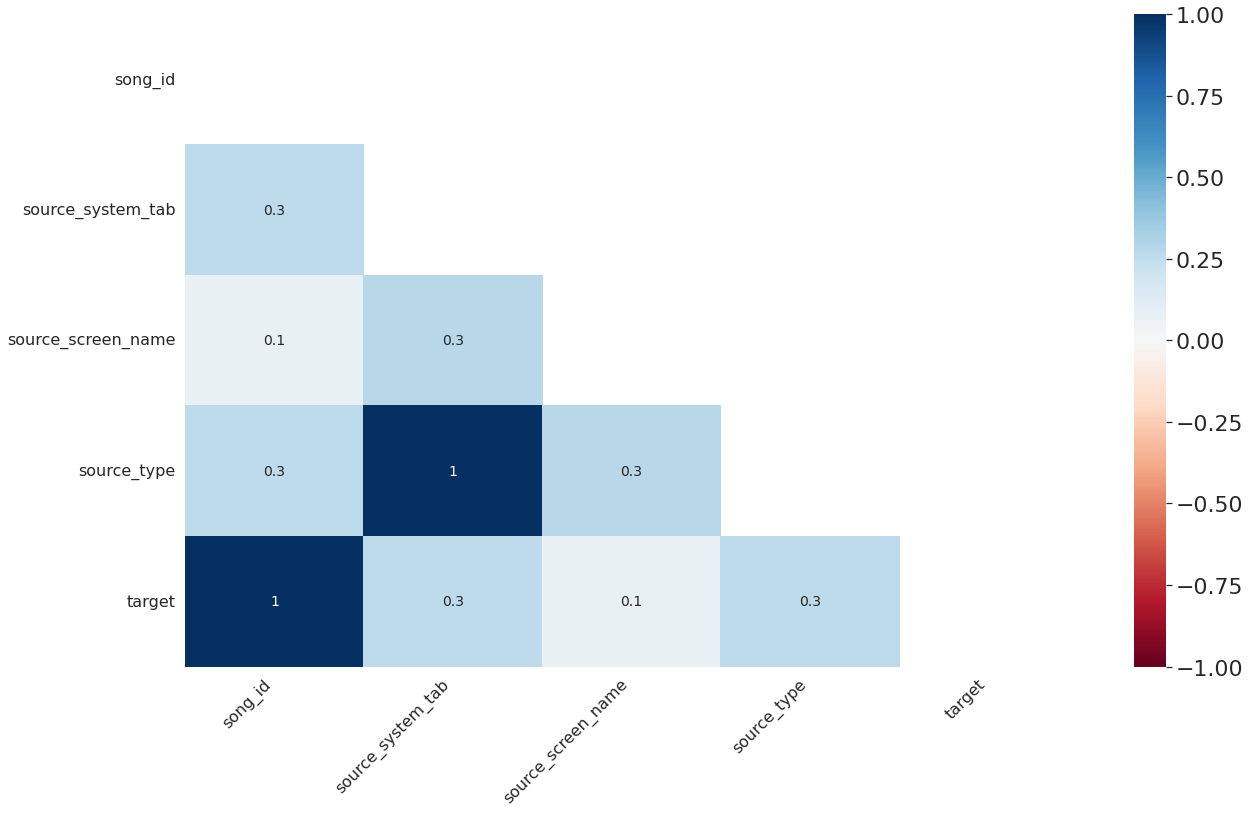

In [43]:
msno.heatmap(train)



*   From the above heatmap we can say that no missing values in msno, song_id or target.
*   source_type and source_system_tab are having positive strongly corelation.
*  In simple lanugauge from the point, where user starts to play the songs and over some tabs it repats the song. 






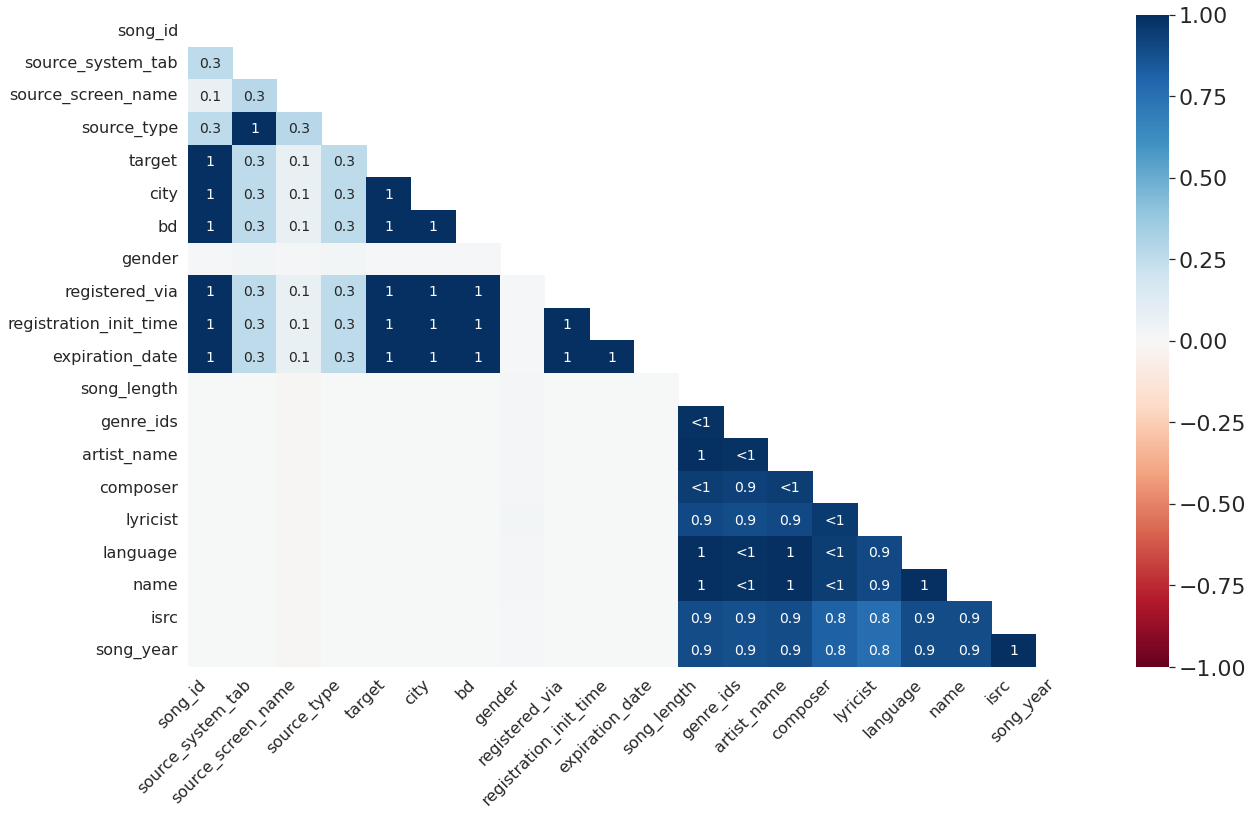

In [44]:
msno.heatmap(train_merged)



*   From the above heatmap we can say that, song length is depends on artist and the language in which it is made.

*   lyrist and composer are also corelated, like some composers have their biases on lyrist and vice versa.

*   song_length is also correlated with artist, composer, lyrist, genre_id, language, name, song_year, isrc.




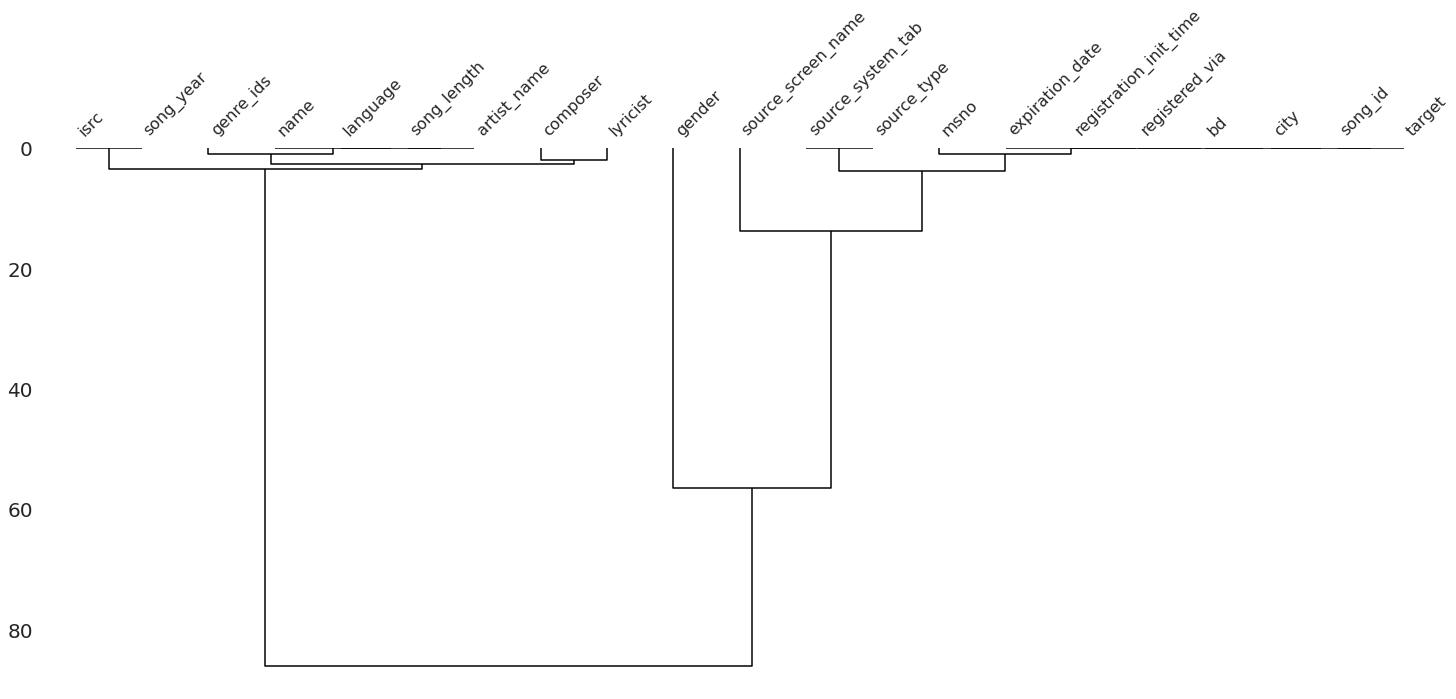

In [46]:
msno.dendrogram(train_merged)

**A strong nullity correlation here we can see:**


*   source_system_tab -> source_type

*   composer -> lyricst
*   lanugage -> song_length, artist_name, name


*  isrc -> song_year



### Conclusion


*   We have analyzed each and every feature from train and validation dataset with the help of different plots like barplot, PDF and CDF.
*   We have also analyzed missing values and their percentages in features.

